There are 10 images in a collection saved under the compressed file IA2.zip. All of those images are in png format. In this assignment, you are required to process those images, so they will be converted to arrays as the final output. 

In particular, please follow the steps listed below: 

1.Read in all of the 10 images in python, resize each of them a 100 by 100 pixels format;  

2.Convert them to greyscale arrays (no color information needs to be kept, so the arrays will be 2‐D); 

3.Flatten the 2‐D array to a 1‐D array (vectors), draw a histogram to present the intensity value distribution of all of the images; 

4.Conduct a histogram equalization to normalize the images, draw a histogram to present the intensity value distribution of all of the images after the normalization; 

5.Compare the histogram in step 4 with step 3, discuss what the difference is. 

Tips: you may consider using a “for loop” for step 1 to step 3, so you could process the whole collection at once.  

Please submit two files: 

1.A Jupyter Notebook file .ipynb includes your python code with your comments # or markdowns, and the results of each successful running through. Use a markdown at the end of the .ipynb file to answer the question in step 5. 

2.A CSV file saves flattened arrays (step 3), each image should be a row, and there should be 100*100 columns. 

In [29]:
from PIL import Image
from pylab import *
import glob

image_list = []
for filename in glob.glob('image/*.PNG'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)
image_list

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1095x590 at 0x7FE8E7E74FD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1090x713 at 0x7FE8CC92FF70>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1075x586 at 0x7FE8C9755B50>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=981x624 at 0x7FE8E7EBF550>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1020x739 at 0x7FE8E7EBF4F0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1096x681 at 0x7FE8E7EA13D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=920x584 at 0x7FE8E7EA1490>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1097x820 at 0x7FE8E7EA1F70>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1097x820 at 0x7FE8E7EA1040>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=556x368 at 0x7FE8E7EA1280>]

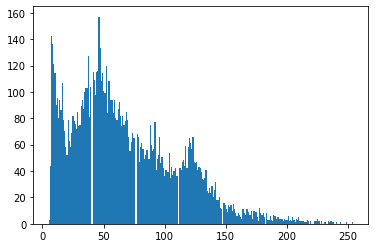

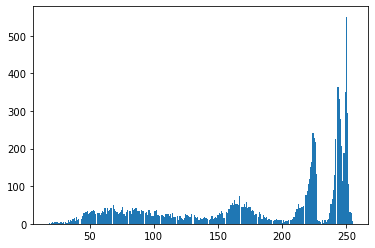

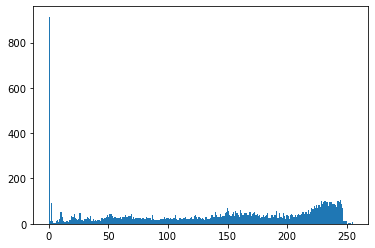

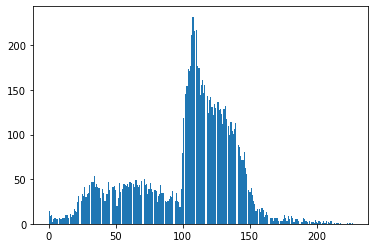

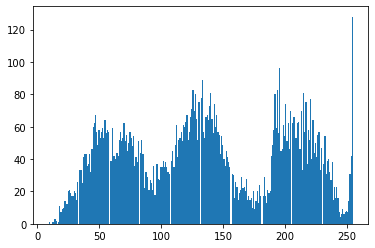

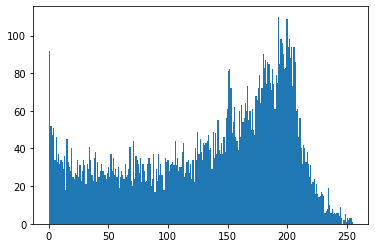

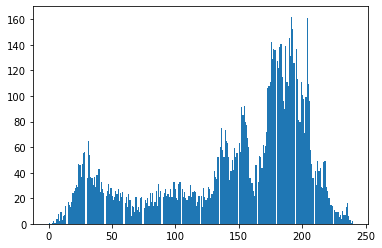

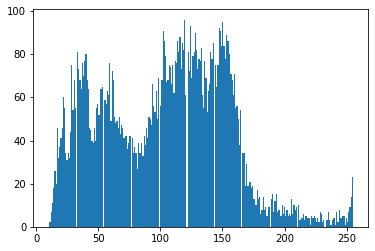

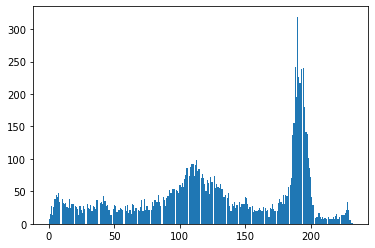

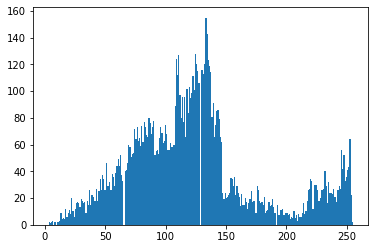

In [34]:
#Q1 - Q3
i_flatten = []
for i in image_list:
    q1 = i.resize((100,100))
    q2 = q1.convert('L')
    q3 = array(q2).flatten()
    figure()
    hist_m = hist(q3, 256)
    i_flatten.append(q3)



In [48]:
output = []
for i in i_flatten:
    output.append(array(i))
df = pd.DataFrame(output)
df.to_csv('A2_part2_Q4.csv')

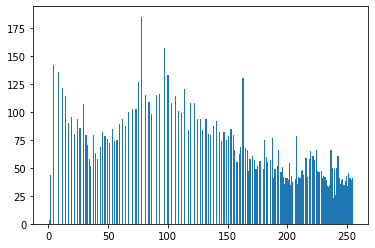

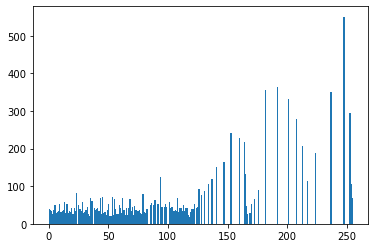

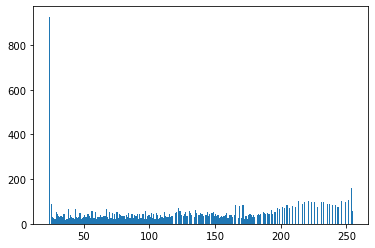

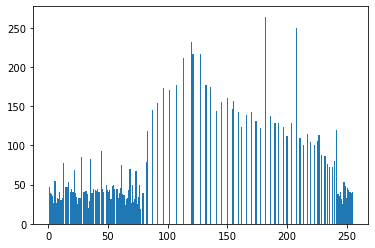

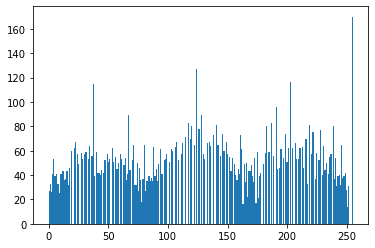

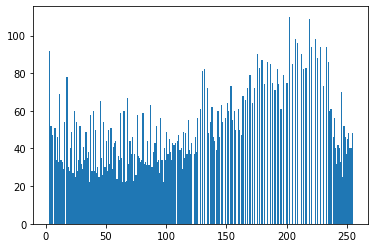

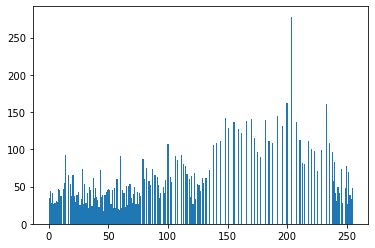

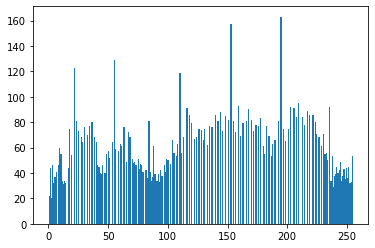

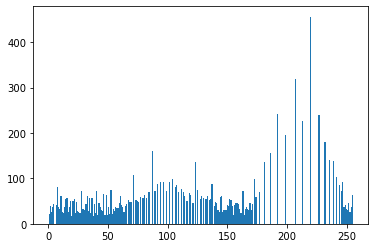

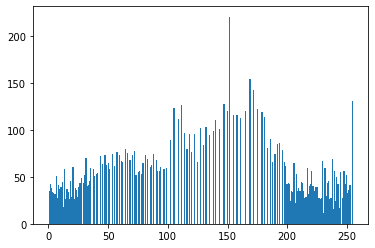

In [57]:
#q4
for i in i_flatten:
    imhist, bins = histogram(i, 256, density=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1]
    im2 = interp(i, bins[:-1], cdf)
    figure()
    hist_n = hist(im2, 256)

Comparing the equalized histogram and orginial one, the differences are:
1. equalized histograms are more flattened
2. boxes in equalized histograms are more evenly distributed across x axis
3. it's easier to compare different iamges with equalized histograms